<a href="https://colab.research.google.com/github/Arzeezar/finger-lang/blob/main/finger_lang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git

fatal: destination path 'Sign-Language-Digits-Dataset' already exists and is not an empty directory.


In [83]:
!pip install opencv-contrib-python
import cv2

In [84]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

folders =['/content/Sign-Language-Digits-Dataset/Dataset/0',
          '/content/Sign-Language-Digits-Dataset/Dataset/1',
          '/content/Sign-Language-Digits-Dataset/Dataset/2',
          '/content/Sign-Language-Digits-Dataset/Dataset/3',
          '/content/Sign-Language-Digits-Dataset/Dataset/4',
          '/content/Sign-Language-Digits-Dataset/Dataset/5',
          '/content/Sign-Language-Digits-Dataset/Dataset/6',
          '/content/Sign-Language-Digits-Dataset/Dataset/7',
          '/content/Sign-Language-Digits-Dataset/Dataset/8',
          '/content/Sign-Language-Digits-Dataset/Dataset/9']
images=[]
labels=[]
def load_images_from_folder(folder):
  for filename in os.listdir(folder):
      img = cv2.imread(os.path.join(folder,filename))
      img = cv2.resize(img,(32,32))
      #img=image.img_to_array(img)
      images.append(img)
      label = folder.split(os.path.sep)[-1]
      labels.append(label)
def convert_images(images):
  X=np.array(images)
  #X=X.reshape(X.shape[0],100*100*3)
  return X
def convert_labels(labels):
  enc = LabelEncoder()
  P=enc.fit_transform(labels)
  Y=to_categorical(P)
  return Y

for folder in folders:
  #print('Readiing from path: '+folder)
  load_images_from_folder(folder)
X=convert_images(images)
Y = convert_labels(labels)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255

#print(X_train.shape)
#print(X_test.shape)

In [131]:
from keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Activation
from keras.models import Sequential
from keras.optimizers import SGD,Adam
cnn = Sequential()
##
cnn.add(Conv2D(6,(5,5),activation='relu',input_shape=(32,32,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(10,(5,5),activation='relu',input_shape=(32,32,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
## loop for depend on your need
cnn.add(Flatten())
cnn.add(Dense(120,activation='relu'))
cnn.add(Dense(240,activation='relu'))
cnn.add(Dense(60,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

adm = Adam(lr=0.002)
cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=adm)
#print(cnn.summary())

Epoch 1/100
46/46 [==============================] - 1s 24ms/step - loss: 2.1863 - accuracy: 0.2051
Epoch 2/100
46/46 [==============================] - 1s 24ms/step - loss: 1.1883 - accuracy: 0.5787
Epoch 3/100
46/46 [==============================] - 1s 23ms/step - loss: 0.6903 - accuracy: 0.7685
Epoch 4/100
46/46 [==============================] - 1s 24ms/step - loss: 0.5023 - accuracy: 0.8212
Epoch 5/100
46/46 [==============================] - 1s 24ms/step - loss: 0.3394 - accuracy: 0.8954
Epoch 6/100
46/46 [==============================] - 1s 23ms/step - loss: 0.2761 - accuracy: 0.9127
Epoch 7/100
46/46 [==============================] - 1s 23ms/step - loss: 0.1911 - accuracy: 0.9376
Epoch 8/100
46/46 [==============================] - 1s 23ms/step - loss: 0.1375 - accuracy: 0.9570
Epoch 9/100
46/46 [==============================] - 1s 23ms/step - loss: 0.1572 - accuracy: 0.9515
Epoch 10/100
46/46 [==============================] - 1s 23ms/step - loss: 0.1025 - accuracy: 0.9667

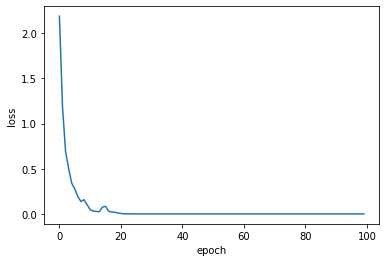

In [132]:
import matplotlib.pyplot as plt
history = cnn.fit(X_train,Y_train,epochs=100,verbose=1)
plt.plot(history.history['loss'])
##plt.title('Loss value')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

6


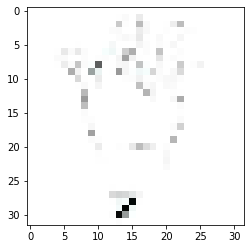

In [133]:
img_path = '/content/finger-language-seven.jpg'
img = cv2.imread(img_path)
img = mg = cv2.resize(img,(32,32))
lala = [0,1,2,3,4,5,6,7,8,9]
lala = convert_labels(lala)
x=convert_images(img)
x = np.expand_dims(x, axis=0)
preds = cnn.predict(x)
preds = preds.reshape(10,)
imgplot = plt.subplots(1, 1)
for i in range(10):
  comparison = preds == lala[i]
  if (comparison.all()):
    print(i)
imgplot = plt.imshow(img)
plt.show() 

In [126]:
score = cnn.evaluate(X_test, Y_test, verbose=0)
 #y= cnn.predict(X_test)
print(cnn.metrics_names)
print(score)

['loss', 'accuracy']
[0.8543330430984497, 0.8917608857154846]
